### Stats and Public Health deliverable - Part 2

#### Author: Amirhossein Kiani
#### Contact: amkoxia@gmail.com
#### Date: 07/09/2023

## Importing libraries and exploring the data set <a class ='author' id='imports'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
testdf = pd.read_csv('.//clean_data_for_NLP_part_2//clean_data//clean_test_dataframe.csv')
traindf = pd.read_csv('.//clean_data_for_NLP_part_2//clean_data/clean_train_dataframe.csv')

In [3]:
# To scorll through all the columns with no restriction

pd.set_option('display.max_columns', None)

In [4]:
traindf.head()

Additional_Number_of_Scoring  Average_Score  \
0                           620            9.0   
1                          1258            9.4   
2                           995            8.1   
3                           853            8.4   
4                          1243            8.1   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  0                     1974   
1                                  6                     4204   
2                                  2                     3826   
3                                  7                     2726   
4                                 11                     6608   

   Review_Total_Positive_Word_Counts  \
0                                164   
1                                  4   
2                                 38   
3                                 10   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review        lat  \
0                                           1                562  51.506558   
1                                           5                276  51.502435   
2                                           1                129  51.504348   
3                                          10                164  51.507377   
4                                          69                639  51.513556   

        lng  weekday_of_review  month_of_review  year_of_review  bed_single  \
0 -0.004514                  1                1            2016           0   
1 -0.000250                  0               10            2016           0   
2 -0.033444                  0                3            2017           0   
3  0.038657                  0                2            2017           0   
4 -0.180002                  1               11            2015           0   

   bed_double  bed_queen  bed_king  trip_leisure  trip_biz  group_solo  \
0           0          0         0             1         0           0   
1           0          0         0             1         0           0   
2           0          0         0             1         0           0   
3           0          0         0             1         0           0   
4           0          0         0             0         1           0   

   group_couple  group_family  Hotel_Name_11 Cadogan Gardens  Hotel_Name_41  \
0             1             0                              0              0   
1             0             0                              0              0   
2             1             0                              0              0   
3             1             0                              0              0   
4             0             0                              0              0   

   Hotel_Name_88 Studios  Hotel_Name_Ace Hotel London Shoreditch  \
0                      0                                       0   
1                      0                                       0   
2                      0                                       0   
3                      0                                       0   
4                      0                                       0   

   Hotel_Name_Adria Boutique Hotel  Hotel_Name_Aloft London Excel  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Hotel_Name_Amba Hotel Charing Cross  Hotel_Name_Amba Hotel Marble Arch  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                              

In [4]:
traindf.shape, testdf.shape

((12798, 2744), (4267, 2744))

### 1.a. Fit a logisitic regression model to this data with the solver set to `lbfgs`. What is the accuracy score on the test set?<a class ='author' id='Q1a'></a>

In [5]:
# Specify the train and test sets

X_train = traindf.drop(['rating'],axis=1)
y_train = traindf['rating']
X_test = testdf.drop(['rating'],axis=1)
y_test = testdf['rating']

In [6]:
# Scale the data
# This is not necessary for linear regression but can enhance the performance of the model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
import time

# Start the timer
start_time = time.time()

# Create a logistic regression model
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

print("Train Accuracy:", lr.score(X_train_scaled,y_train))
print("Test Accuracy:", lr.score(X_test_scaled,y_test))

# End the timer
end_time = time.time()

# Measure the runtime of the model (useful for later comparisons in what follows)
runtime = end_time - start_time

print("Runtime:", runtime, "seconds")

Train Accuracy: 0.885841537740272
Test Accuracy: 0.7328333723927818
Runtime: 6.402202606201172 seconds


### 1.b. What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question<a class ='author' id='Q1b'></a>

In [13]:
# Get the coefficients and feature names
coefficients = lr.coef_[0]
feature_names = X_train.columns

# Create a dataframe to store the coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [14]:
coefficients_df.head()

,Feature,Coefficient
0,Additional_Number_of_Scoring,-0.022776
1,Average_Score,0.479127
2,Review_Total_Negative_Word_Counts,0.297930
3,Total_Number_of_Reviews,-0.033834
4,Review_Total_Positive_Word_Counts,-0.187589


Let's now get the top 20 postive and negative review words. I distinguish positive review words using the fact that they all start with `_p` in the dataset; for negatives it's `_n`.

In [12]:
# Sort the dataframe by coefficient values for positive reviews (ascending order)
positive_reviews = coefficients_df.sort_values('Coefficient', ascending=False)
top_20_p = [x for x in positive_reviews['Feature'].tolist() if x[:2] == 'p_']

# Sort the dataframe by coefficient values for negative reviews (descending order)
negative_reviews = coefficients_df.sort_values('Coefficient', ascending=True)
top_20_n = [x for x in negative_reviews['Feature'].tolist() if x[:2] == 'n_']

# Display the most predictive words for positive and negative reviews
print("Most predictive words for positive reviews:")
print(top_20_p[:19])
print("\nMost predictive words for negative reviews:")
print(top_20_n[:19])

Most predictive words for positive reviews:
['p_gift', 'p_excellent', 'p_incredible', 'p_exceed', 'p_impeccable', 'p_everything', 'p_hair', 'p_great', 'p_staff', 'p_deluxe', 'p_arrange', 'p_special', 'p_could', 'p_exceptional', 'p_amazingly', 'p_already', 'p_fantastic', 'p_perfect', 'p_amaze']

Most predictive words for negative reviews:
['n_premier', 'n_moment', 'n_wood', 'n_star', 'n_confirmation', 'n_lodge', 'n_staff', 'n_room', 'n_unfriendly', 'n_holiday', 'n_uncomfortable', 'n_air', 'n_daylight', 'n_refuse', 'n_attitude', 'n_basic', 'n_interest', 'n_rude', 'n_smelt']


### 1.c. Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?<a class ='author' id='Q1c'></a>

In general, reducing the dimensionality using PCA can lead to faster runtime for logistic regression due to the following reasons:

- **Reduced feature space:** PCA aims to capture the most important information in the data by projecting it onto a lower-dimensional subspace. By reducing the number of dimensions, the logistic regression model has fewer features to consider, resulting in faster computation.

- **Elimination of multicollinearity:** PCA can help address multicollinearity issues when there are high correlations among the original features. By combining highly correlated features into fewer principal components, the logistic regression model can avoid redundant information, leading to improved runtime efficiency.

We can see confirm the faster runtime in what follows:

In [15]:
X_train = traindf.drop(['rating'],axis=1)
y_train = traindf['rating']
X_test = testdf.drop(['rating'],axis=1)
y_test = testdf['rating']

In [19]:
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA
# Just an arbitrary number of components. We can determine more optimal component numbers by trying different numbers
pca = PCA(n_components=10) 
X_train_PCA= pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

# Create a new dataframe with the reduced-dimensional representation
df_pca = pd.DataFrame(data=X_train_pca, columns='PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 PC9 PC10'.split(' '))

# Concatenate the target variable with the reduced-dimensional data
df_final = pd.concat([df_pca, y_train], axis=1)

In [18]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,rating
0,-0.801459,29.158278,3.616392,3.940165,2.818369,-1.767524,1.273251,-3.509608,1.673570,1.861958,1
1,-1.100406,-2.246572,0.982283,1.871127,0.395181,3.501423,1.076335,-0.235627,-0.347158,0.445196,1
2,-2.152274,6.466229,7.295330,7.170348,4.640640,-2.025819,-0.206046,-2.020472,3.792454,-2.079145,1
3,-1.668399,-1.835804,-0.967086,0.948258,0.333447,-0.281069,-0.225946,0.042752,0.252569,-0.308331,0
4,-0.618746,-1.259428,-1.267539,-0.404252,0.048214,-0.180015,1.865482,1.056967,0.389803,-0.654509,0


In [20]:
# Start the timer
start_time = time.time()

lr_pca = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model on the training data
lr_pca.fit(X_train_pca, y_train)

print("Train Accuracy:", lr_pca.score(X_train_PCA,y_train))
print("Test Accuracy:", lr_pca.score(X_test_PCA,y_test))

# End the timer
end_time = time.time()
runtime = end_time - start_time

print("Runtime:", runtime, "seconds")

Train Accuracy: 0.7598843569307704
Test Accuracy: 0.7621279587532224
Runtime: 0.027849674224853516 seconds


### 1.d. List one advantage and one disadvantage of dimensionality reduction<a class ='author' id='Q1d'></a>

#### Advantage of Dimensionality Reduction:

- **Improved computational efficiency:** By reducing the number of dimensions, dimensionality reduction techniques such as PCA can simplify the dataset and reduce the computational complexity of subsequent tasks, such as modeling or analysis. This can lead to faster processing times and more efficient resource utilization.

- **Removing colinearities:** Given the structure of the some dimensionality reduction algorithms, such as PCA, colinearities can be removed in transforming features of the dataset into their principal componentss. Ths is valuable for algorithms that are sensitives to colinearities between features, such as linear or logistic regression.

#### Disadvantage of Dimensionality Reduction:

- **Loss of interpretability:** It's hard to interpret the principal components of a dataset, especially after the first one.

- **Information loss:** Dimensionality reduction techniques aim to reduce the dimensionality while preserving the most important information in the data. However, in the process of reducing dimensions, there is a possibility of losing some amount of information. Features that have low variance or contribute to the data's complexity may be discarded.

### 2.a. Fit a KNN model to this data. What is the accuracy score on the test set?<a class ='author' id='Q2a'></a>

In [21]:
# Specify train/test data and scale the data

X_train = traindf.drop(['rating'],axis=1)
y_train = traindf['rating']
X_test = testdf.drop(['rating'],axis=1)
y_test = testdf['rating']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import warnings # I had to use this to avoid some upleasant warning that shows up

start_time = time.time()

# Ignore the specific warning related to mode function
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

print("Train Accuracy:", knn.score(X_train,y_train))
print("Test Accuracy:", knn.score(X_test,y_test))

end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, 'seconds')

Train Accuracy: 0.751211126738553
Test Accuracy: 0.6367471291305367
Runtime: 11.459249496459961 seconds


### 2.b. KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?<a class ='author' id='Q2b'></a>

The relation between the number of observations and the runtime of knn is **direct**: as the number of observations decreases (increases), the runtime decreases (increases). 

Below I'll select 50% of the data, as an arbitrary number, to establish this point.

In [26]:
traindf_50_percent = traindf.sample(int(.5*len(traindf)))
testdf_50_percent = testdf.sample(int(.5*len(testdf)))

In [27]:
X_train_50 = traindf_50_percent.drop(['rating'],axis=1)
y_train_50 = traindf_50_percent['rating']
X_test_50 = testdf_50_percent.drop(['rating'],axis=1)
y_test_50 = testdf_50_percent['rating']

In [28]:
start_time = time.time()

# Ignore the specific warning related to mode function
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()
knn.fit(X_train_50,y_train_50)

print("Train Accuracy:", knn.score(X_train_50,y_train_50))
print("Test Accuracy:", knn.score(X_test_50,y_test_50))

end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Train Accuracy: 0.7524613220815752
Test Accuracy: 0.602906704172527
Runtime: 2.9860496520996094 seconds


### 2.c. List one advantage and one disadvantage of reducing the number of observations.<a class ='author' id='Q2c'></a>


#### Advantage of reducing the number of observations:

- **Improved computational efficiency:** By reducing the number of observations, the runtime of the KNN algorithm can be significantly decreased. With a smaller dataset, fewer distance calculations and comparisons are required, resulting in faster computations.

#### Disadvantage of reducing the number of observations:

- **Potential loss of information:** Reducing the number of observations may result in the loss of valuable information present in the dataset. By discarding some data points, we may overlook important patterns or trends that could influence the accuracy and generalizability of the KNN model.

### 2.d. Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.<a class ='author' id='Q2d'></a>

I'll just put everything in one block of code and add comments when needed. Most of the process is similar to what we had above; we could also utilize pipelines to make this shorter.

In [30]:
from sklearn.model_selection import train_test_split

# Ignoring the specific warning from the previous questions
warnings.filterwarnings("ignore")

# Split the dataset into train, validation, and test sets
X_remainder = traindf.drop(['rating'],axis=1)
y_remainder = traindf['rating']
X_test = testdf.drop(['rating'],axis=1)
y_test = testdf['rating']
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.25, random_state=69)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


k_values = range(3, 50, 2)  # A list of K values to try

train_accuracies = []
val_accuracies = []

for k in k_values:
    # Create a KNN model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Calculate the accuracy on the validation set
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_val, y_val)
    test_acc = knn.score(X_test, y_test)
    
    # Store the accuracy for the current K value
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

Let's plot the accuracies:

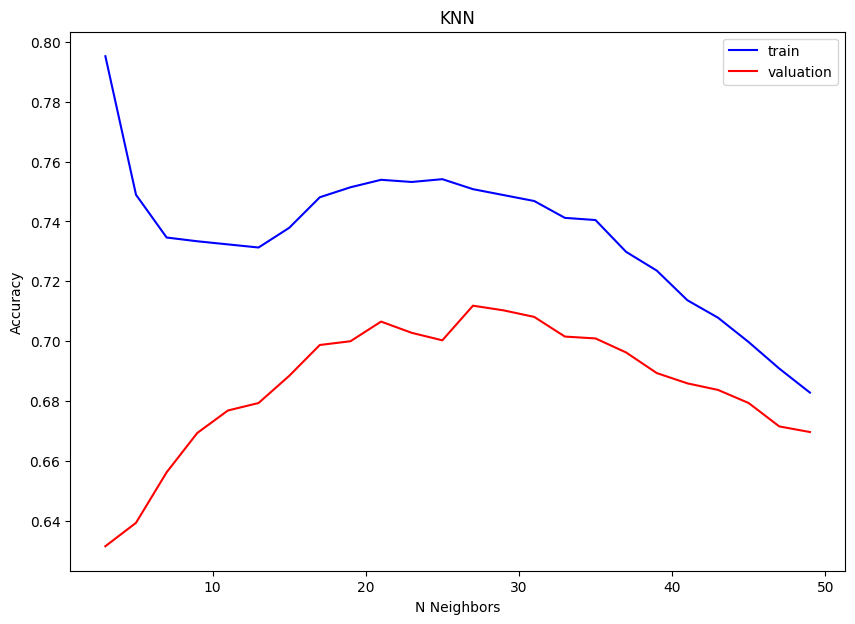

In [32]:
plt.figure(figsize=(10, 7))
plt.plot(k_values, train_accuracies, c='blue', label='train')
plt.plot(k_values, val_accuracies, c='red', label='valuation')
         
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy')
plt.title("KNN")
plt.legend()
plt.show()

By Looking at train and validation plots, it seems that an optimal number of neighbors is around 30: the accuracy of the validation is around its peak, while its distance from the accuracy of the training data is relatively low. 

Now let's retrain our model with 30 neighbors, and assess its performance on the test data:

In [33]:
# KNN odel is the best one

scaler= StandardScaler()
scaler.fit(X_remainder)

X_remainder = scaler.transform(X_remainder)
X_test = scaler.transform(X_test)

final_knn = KNeighborsClassifier(n_neighbors=30)

final_knn.fit(X_remainder, y_remainder)

print('final accuracy is', final_knn.score(X_test, y_test))

final accuracy is 0.6547925943285681


This makes sense: the accuracy of the model fitted on the compelgtely new data is slightly lower than its accruacy on the valuation data.

### 2.e. What is the issue with splitting the data into train and validation sets after performing vectorization?<a class ='author' id='Q2e'></a>

This can introduce a data leakage issue. Data leakage occurs when information from the validation set is unintentionally used during the training process, leading to overly optimistic performance estimates and potential model overfitting.

This may happens because the vectorization process has access to the entire dataset, including the validation set, which it should not have. Consequently, it can capture specific words their frequencies, or patterns present in the validation set.

### 3.a. Fit a decision tree model to this data. What is the accuracy score on the test set?<a class ='author' id='Q3a'></a>

In [36]:
from sklearn.tree import DecisionTreeClassifier

X_train = traindf.drop(['rating'],axis=1)
y_train = traindf['rating']
X_test = testdf.drop(['rating'],axis=1)
y_test = testdf['rating']

start_time = time.time()

# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Chosing an arbitrary depth for the tree
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)


print("Train Accuracy:", dt.score(X_train,y_train))
print("Test Accuracy:", dt.score(X_test,y_test))

end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Train Accuracy: 0.824503828723238
Test Accuracy: 0.7358800093742677
Runtime: 2.228647232055664 seconds


### 3.b. Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.<a class ='author' id='Q3b'></a>


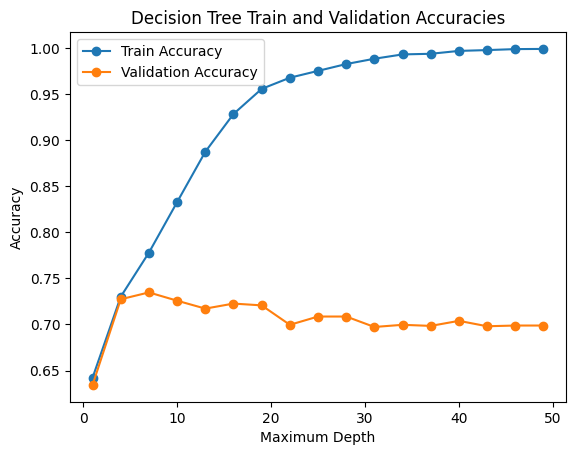

In [37]:
# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

max_depth_values = range(1,50,3)  # List of maximum depth values to try

train_accuracies = []
val_accuracies = []

for max_depth in max_depth_values:
    # Create a Decision Tree classifier with the current maximum depth value
    dt = DecisionTreeClassifier(max_depth=max_depth)

    # Fit the classifier on the training data
    dt.fit(X_train, y_train)

    # Calculate the accuracy on the train and validation sets
    train_accuracy = dt.score(X_train, y_train)
    val_accuracy = dt.score(X_val, y_val)
    
    # Store the accuracies for the current maximum depth value
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
# Plot the train and validation accuracies for different maximum depth values
plt.plot(max_depth_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, val_accuracies, label='Validation Accuracy', marker='o')

plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Train and Validation Accuracies')
plt.legend()
plt.show()

From the plot above it seems that the optimal point where valuation accuracy is high and close to trauning accuracy is around 6. Let's do a more granular plot around that vicinity:

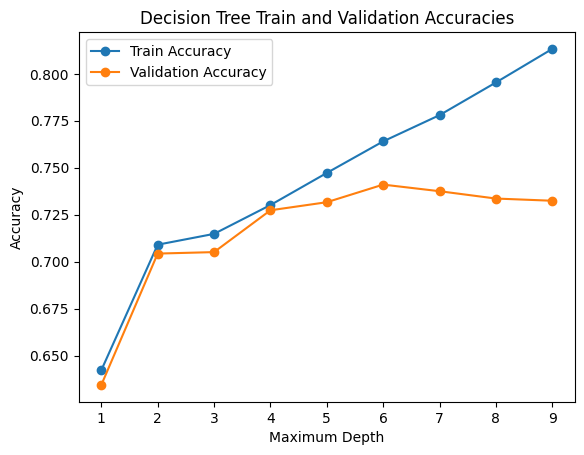

In [39]:
max_depth_values = range(1,10)  # List of maximum depth values to try

train_accuracies = []
val_accuracies = []

for max_depth in max_depth_values:
    # Create a Decision Tree classifier with the current maximum septh value
    dt = DecisionTreeClassifier(max_depth=max_depth)

    # Fit the classifier on the training data
    dt.fit(X_train, y_train)

    # Calculate the accuracy on the train and validation sets
    train_accuracy = dt.score(X_train, y_train)
    val_accuracy = dt.score(X_val, y_val)
    
    # Recod the accuracies for the current maximum depth value
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
# Plot the train and validation accuracies for different maximum depth values
plt.plot(max_depth_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, val_accuracies, label='Validation Accuracy', marker='o')

plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Train and Validation Accuracies')
plt.legend()
plt.show()

Okay, I think the depth of 6 is the best one. Let's now retrain the model based on this depth, and the evaluate its accuracy:

In [41]:
dt = DecisionTreeClassifier(max_depth=6)

dt.fit(X_train, y_train)

print('The final accuracy for our decision tree is', dt.score(X_test, y_test))

The final accuracy for our decision tree is 0.7480665573002109


### 3.c. Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)<a class ='author' id='Q3c'></a>


#### Advantages of Decision Trees over KNN:

- **Interpretability:** Decision trees provide interpretable models. The tree structure is easy to understand and visualize, making it intuitive to interpret the decision-making process. Each node represents a decision or condition based on features, and each leaf node represents a predicted class or value. In contrast, KNN does not offer such clear interpretability.

- **Scalablity:** Desicion trees can handle high-dimesnional data more efficiently compared to KNN. As the number of dimensions (featrues) increases, the curss of dimensionality becmoes a challange for KNN. KNN calcualtes distanes between data points, and in high-dimensional spaces, the notion of distance becomess less informtive due to the sparsity of data. In contast, decision trees make splits based on feature thresholds, and the number of dimesnions does not impact the effciency of splitting. Decision trees can effectivly handle high-dimesnional data without suffering from the curss of dimensionality.


#### Weaknesses of Decision Trees:

- **Overfitting:** Decision trees are prone to overfitting, particularly when the maximum depth or complexity of the tree is not appropriately controlled. A decision tree can grow to fit the training data too closely, capturing noise and outliers in the process. This can lead to poor generalization to unseen data, resulting in decreased performance.

- **Senstivty to Small Changes:** Decision trees can be sensitive to small changes in the training data. Adding or removing a few data points or features can potentially lead to a different tree structure, which may affect the predictions.

### 4. What is the purpose of the validation set, i.e., how is it different than the test set?<a class ='author' id='Q4'></a>

The validation set serves a distinct purpose in the model development process and differs from the test set.

The validation set is used to assess the performance of a model during the model development and hyperparameter optimizztaion phase. It helps in making decisions regarding model selection, optimizing hyperparameters and evaluating different variations of the model.

Validation set and test set have two main difference:

- **Hyperparameter Tuning:** After training the model, the validation set is used to assess the model's performance and fine-tune its hyperparameters. Hyperparameters are settings or configurations that are not learned from the data but affect the model's behavior. Examples include the learning rate, number of neigbhors in KNN,the maximum depth of a decision tree. By evaluating the model on the validation set with different hyperparameter settings, we can choose the combination that yields the best performance.

- **Final Evaluation:** Once the model is fully trained and its hyperparameters are optimized using the validation set, we assess its performance and evaluate its ability to generalize to new, unseen data using the test set. The test set serves as an unbiased measure of the model's performance on unseen dats.

Essentially, since we use the validation set the fine-tune the model, the model is somewhat biased towards some of the formerly unseen data (as if it is overfitted on them). Test set is assured to be unseen, acting like a proxy of real-wordl data, and allowing for truely assessing the performanc eof the model.

### 5. Re-run a decision tree or logistic regression on the data again:

#### a. Perform a 5-fold cross validation to optimize the hyperparameters of your model.<a class ='author' id='Q5a'></a>

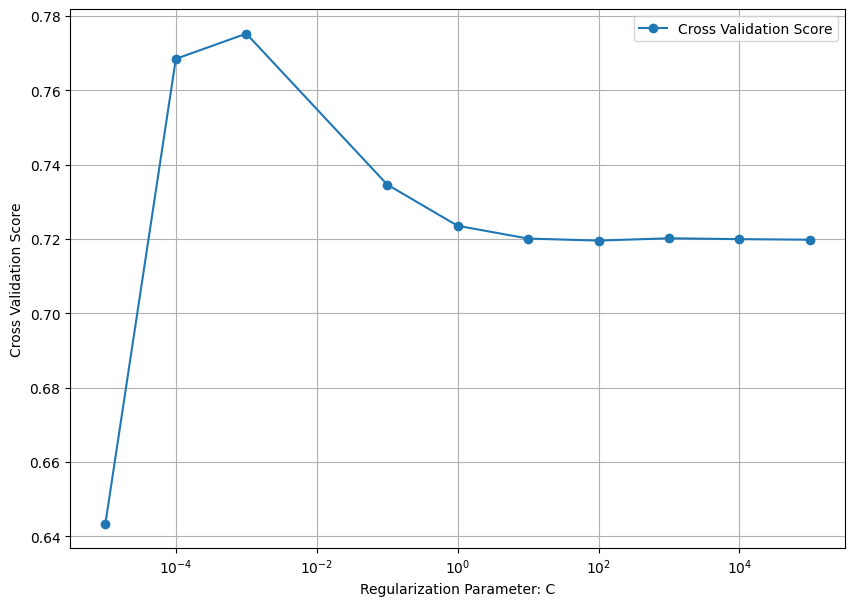

The best model has C =  0.001
Runtime: 95.8235285282135


In [45]:
from sklearn.model_selection import cross_val_score

X_train = traindf.drop(['rating'], axis=1)
y_train = traindf['rating']
X_test = testdf.drop(['rating'], axis=1)
y_test = testdf['rating']

start_time = time.time()

cross_validation_scores = []

C_range = np.array([.00001,.0001,.001,.1,1,10,100,1000,10000,100000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    cv_score = np.mean(cross_val_score(LR_model, X_remainder, y_remainder, cv = 5))
    cross_validation_scores.append(cv_score)

plt.figure(figsize=(10, 7))
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='o')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ", C_range[which_max])

end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime)

Once we finished with the hyperparameter tuning and model selection, we create the final model, retrain on the remainder and score on the test set:

In [48]:
lr = LogisticRegression(C=.001,random_state=1)
lr.fit(X_train,y_train)

print("Train Accuracy:", lr.score(X_train,y_train))
print("Test Accuracy:", lr.score(X_test,y_test))

Train Accuracy: 0.7226910454758556
Test Accuracy: 0.7187719709397703


#### b. What does your confusion matrix look like for your best model on the test set?<a class ='author' id='Q5b'></a>

In [52]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion_mat, index=np.unique(y_test), columns=np.unique(y_test))

print("Confusion Matrix:")
print(confusion_df)

Confusion Matrix:
     0     1
0  970   839
1  361  2097


In [53]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.73      0.54      0.62      1809
           1       0.71      0.85      0.78      2458

    accuracy                           0.72      4267
   macro avg       0.72      0.69      0.70      4267
weighted avg       0.72      0.72      0.71      4267

